<Figure size 1000x800 with 0 Axes>

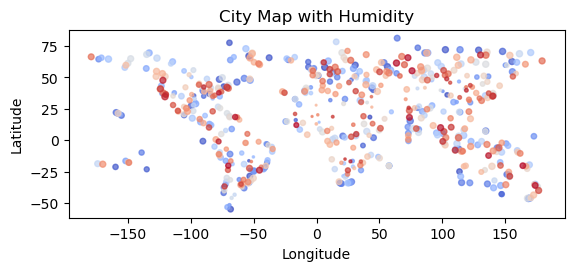

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests

city_data_df = pd.read_csv("cities.csv")

# Set up the Geoapify API
api_key = "3e80d80f320248279750682c7eb5d3dd"

# Function to get geographical coordinates for each city
def get_coordinates(city_name, country_code):
    base_url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        "text": f"{city_name}, {country_code}",
        "apiKey": api_key,
    }
    response = requests.get(base_url, params=params).json()
    if response.get("features"):
        location = response["features"][0]["geometry"]["coordinates"]
        return location[1], location[0]  # Latitude, Longitude
    else:
        return None, None

# Add Latitude and Longitude columns to the DataFrame
city_data_df["Latitude"] = ""
city_data_df["Longitude"] = ""

# Loop through each city and retrieve geographical coordinates
for index, row in city_data_df.iterrows():
    lat, lon = get_coordinates(row["City"], row["Country"])
    city_data_df.at[index, "Latitude"] = lat
    city_data_df.at[index, "Longitude"] = lon

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    city_data_df,
    geometry=gpd.points_from_xy(city_data_df["Longitude"], city_data_df["Latitude"])
)

# Create the map
plt.figure(figsize=(10, 8))
gdf.plot(markersize=city_data_df["Humidity"] / 5, alpha=0.7, cmap='coolwarm', legend=True)

plt.title("City Map with Humidity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [3]:
# Narrow down the DataFrame based on ideal weather conditions
ideal_weather_df = city_data_df[
    (city_data_df["Max Temp"] > 21) & 
    (city_data_df["Max Temp"] < 27) & 
    (city_data_df["Wind Speed"] < 4.5) & 
    (city_data_df["Cloudiness"] == 0)
]

# Display the cities with ideal weather conditions
print(ideal_weather_df)


     City_ID            City      Lat       Lng  Max Temp  Humidity  \
45        45           kapaa  22.0752 -159.3190     22.99        84   
51        51            hilo  19.7297 -155.0900     26.27        83   
63        63           banda  25.4833   80.3333     24.62        52   
81        81   makakilo city  21.3469 -158.0858     21.66        81   
152      152         kahului  20.8947 -156.4700     23.80        60   
197      197             gat  31.6100   34.7642     24.38       100   
211      211          laguna  38.4210 -121.4238     21.67        79   
240      240     tikaitnagar  26.9500   81.5833     23.56        59   
265      265     san quintin  30.4833 -115.9500     21.20        74   
340      340   santa rosalia  27.3167 -112.2833     24.62        56   
363      363          narwar  25.6500   77.9000     22.35        55   
375      375    port hedland -20.3167  118.5667     21.03        73   
381      381       roebourne -20.7833  117.1333     23.48        65   
391   

In [4]:
# Filtered DataFrame with ideal weather conditions
ideal_weather_df = city_data_df[
    (city_data_df["Max Temp"] > 21) & 
    (city_data_df["Max Temp"] < 27) & 
    (city_data_df["Wind Speed"] < 4.5) & 
    (city_data_df["Cloudiness"] == 0)
]

# Create the hotel_df DataFrame with the desired columns
hotel_df = ideal_weather_df[["City", "Country", "Latitude", "Longitude", "Humidity"]]

# Display the hotel_df DataFrame
print(hotel_df)



               City Country   Latitude   Longitude  Humidity
45            kapaa      US  22.074733  -159.31916        84
51             hilo      US  19.707373  -155.08158        83
63            banda      IN   25.47378   80.331273        52
81    makakilo city      US  21.346944 -158.085833        81
152         kahului      US   20.88941 -156.472712        60
197             gat      IL  31.626862   34.795109       100
211          laguna      US  35.035175 -107.387405        79
240     tikaitnagar      IN   26.94584    81.56544        59
265     san quintin      MX  23.258183  -97.966021        74
340   santa rosalia      MX  26.681748 -105.456666        56
363          narwar      IN  25.643326   77.911731        55
375    port hedland      AU -20.311181  118.580118        73
381       roebourne      AU -20.772371  117.145828        65
391  saint-francois      FR    16.2532  -61.275071        57
409       capoterra      IT  39.175313     8.97195        71
421          stolac     

In [7]:
import pandas as pd
import requests



# Set up the Geoapify API
api_key = "3e80d80f320248279750682c7eb5d3dd"

# Function to find the nearest hotel within 10,000 meters of the given coordinates
def find_nearest_hotel(lat, lon):
    base_url = "https://api.geoapify.com/v1/places"
    params = {
        "lat": lat,
        "lon": lon,
        "categories": "hotels",
        "apiKey": api_key,
        "radius": 10000,
    }
    response = requests.get(base_url, params=params).json()
    if response.get("features"):
        hotel_name = response["features"][0]["properties"]["name"]
        return hotel_name
    else:
        return None


hotel_df["Nearest Hotel"] = ""


for index, row in hotel_df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    nearest_hotel = find_nearest_hotel(lat, lon)
    hotel_df.at[index, "Nearest Hotel"] = nearest_hotel

# Display the hotel_df DataFrame with the nearest hotel information
print(hotel_df)



def find_nearest_hotel(lat, lon):
    base_url = "https://api.geoapify.com/v1/places"
    params = {
        "lat": lat,
        "lon": lon,
        "categories": "hotels",
        "apiKey": api_key,
        "radius": 10000,
    }
    response = requests.get(base_url, params=params).json()
    if response.get("features"):
        hotel_name = response["features"][0]["properties"]["name"]
        return hotel_name
    else:
        return None

# Add a new column to store the nearest hotel for each city
hotel_df["Nearest Hotel"] = ""

# Loop through each city and find the nearest hotel
for index, row in hotel_df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    nearest_hotel = find_nearest_hotel(lat, lon)
    hotel_df.at[index, "Nearest Hotel"] = nearest_hotel

# Display the hotel_df DataFrame with the nearest hotel information
print(hotel_df)


/var/folders/x0/9m8y_tkn2hjg9rwftz8tbq5r0000gn/T/ipykernel_26906/2267142009.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Nearest Hotel"] = ""


               City Country   Latitude   Longitude  Humidity Nearest Hotel
45            kapaa      US  22.074733  -159.31916        84          None
51             hilo      US  19.707373  -155.08158        83          None
63            banda      IN   25.47378   80.331273        52          None
81    makakilo city      US  21.346944 -158.085833        81          None
152         kahului      US   20.88941 -156.472712        60          None
197             gat      IL  31.626862   34.795109       100          None
211          laguna      US  35.035175 -107.387405        79          None
240     tikaitnagar      IN   26.94584    81.56544        59          None
265     san quintin      MX  23.258183  -97.966021        74          None
340   santa rosalia      MX  26.681748 -105.456666        56          None
363          narwar      IN  25.643326   77.911731        55          None
375    port hedland      AU -20.311181  118.580118        73          None
381       roebourne      

/var/folders/x0/9m8y_tkn2hjg9rwftz8tbq5r0000gn/T/ipykernel_26906/2267142009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Nearest Hotel"] = ""


               City Country   Latitude   Longitude  Humidity Nearest Hotel
45            kapaa      US  22.074733  -159.31916        84          None
51             hilo      US  19.707373  -155.08158        83          None
63            banda      IN   25.47378   80.331273        52          None
81    makakilo city      US  21.346944 -158.085833        81          None
152         kahului      US   20.88941 -156.472712        60          None
197             gat      IL  31.626862   34.795109       100          None
211          laguna      US  35.035175 -107.387405        79          None
240     tikaitnagar      IN   26.94584    81.56544        59          None
265     san quintin      MX  23.258183  -97.966021        74          None
340   santa rosalia      MX  26.681748 -105.456666        56          None
363          narwar      IN  25.643326   77.911731        55          None
375    port hedland      AU -20.311181  118.580118        73          None
381       roebourne      

In [4]:
import pandas as pd
import geopandas as gpd
import folium
import requests

# Filtered DataFrame with ideal weather conditions
ideal_weather_df = city_data_df[
    (city_data_df["Max Temp"] > 21) &
    (city_data_df["Max Temp"] < 27) &
    (city_data_df["Wind Speed"] < 4.5) &
    (city_data_df["Cloudiness"] == 0)
]

# Create the hotel_df DataFrame with the desired columns
hotel_df = ideal_weather_df[["City", "Country", "Lat", "Lng", "Humidity"]]

# Set up the Geoapify API
api_key = "3e80d80f320248279750682c7eb5d3dd"

# Function to find the nearest hotel within 10,000 meters of the given coordinates
def find_nearest_hotel(row):
    base_url = "https://api.geoapify.com/v1/places"
    params = {
        "lat": row["Lat"],
        "lon": row["Lng"],
        "categories": "hotels",
        "radius": 10000,
        "apiKey": api_key,
    }
    response = requests.get(base_url, params=params).json()
    if response.get("features"):
        hotel_name = response["features"][0]["properties"]["name"]
        return hotel_name
    else:
        return "No hotel found within 10,000 meters"

# Add a new column to store the nearest hotel for each city
hotel_df["Nearest Hotel"] = hotel_df.apply(find_nearest_hotel, axis=1)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    hotel_df,
    geometry=gpd.points_from_xy(hotel_df["Lng"], hotel_df["Lat"])
)

# Create the map with hover tooltips
m = folium.Map(location=[hotel_df["Lat"].mean(), hotel_df["Lng"].mean()], zoom_start=4)

# Add points to the map with hover tooltips
for idx, row in gdf.iterrows():
    popup_text = f"City: {row['City']}<br>Country: {row['Country']}<br>Humidity: {row['Humidity']}%<br>Nearest Hotel: {row['Nearest Hotel']}"
    folium.Marker(location=[row['Lat'], row['Lng']], popup=popup_text).add_to(m)

# Display the map
m


/var/folders/x0/9m8y_tkn2hjg9rwftz8tbq5r0000gn/T/ipykernel_27371/2023496148.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Nearest Hotel"] = hotel_df.apply(find_nearest_hotel, axis=1)
